In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Load data
yearly_df = pd.read_csv('Data/yearly_deaths_by_clinic.csv')
monthly_df = pd.read_csv('Data/monthly_deaths.csv')

C:\Users\sameer\AppData\Local\Temp\ipykernel_19912\3952042681.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Data Wrangling / Cleansing

In [2]:
# Group births & deaths by clinic
clinic_deaths_sum = yearly_df.groupby('clinic')['deaths'].sum()
clinic_births_sum = yearly_df.groupby('clinic')['births'].sum()

# Add a column showing proportion of deaths per clinic
yearly_df['Proportion of Deaths'] = yearly_df['deaths'] / yearly_df['births']

# Separate clinics into 2 datasets
clinic_1 = yearly_df[yearly_df['clinic'] == 'clinic 1']
clinic_2 = yearly_df[yearly_df['clinic'] == 'clinic 2']


## Visualize

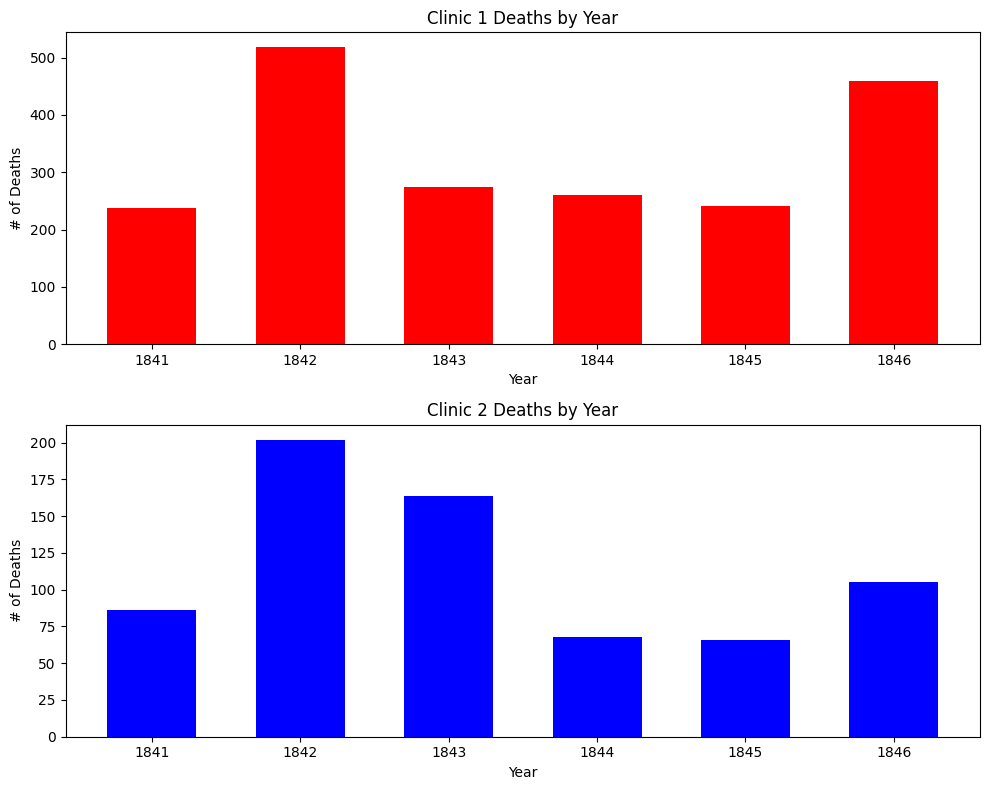

In [5]:
# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Clinic 1 deaths by year
axes[0].bar(clinic_1['year'], clinic_1['deaths'], width=0.6, color='red')
axes[0].set_title('Clinic 1 Deaths by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('# of Deaths')

# Clinic 2 deaths by year
axes[1].bar(clinic_2['year'], clinic_2['deaths'], width=0.6, color='blue')
axes[1].set_title('Clinic 2 Deaths by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('# of Deaths')

plt.tight_layout()
plt.show()

Comparing the raw death counts from each clinic, Clinic 1 consistently had more deaths per year than Clinic 2. Let's continue to analyze before we make any conclusions.  

Text(0, 0.5, 'Proportion of Deaths')

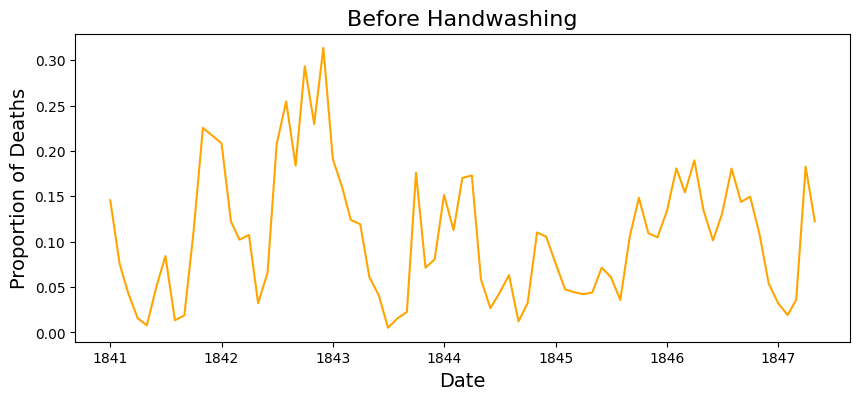

In [7]:
monthly_df["Proportion of Deaths"]= monthly_df["deaths"] / monthly_df["births"]
monthly_df['date'] =  pd.to_datetime(monthly_df['date'])
# Label the date at which handwashing started to "start_handwashing"
start_handwashing = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly_df[monthly_df["date"] < start_handwashing]
after_washing = monthly_df[monthly_df["date"] >= start_handwashing]

fig,ax = plt.subplots(figsize = (10,4))
x= before_washing["date"]
y= before_washing["Proportion of Deaths"]
plt.plot(x, y, color= "orange")
plt.title("Before Handwashing", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Proportion of Deaths", fontsize=14)

Text(0, 0.5, 'Proportion of Deaths')

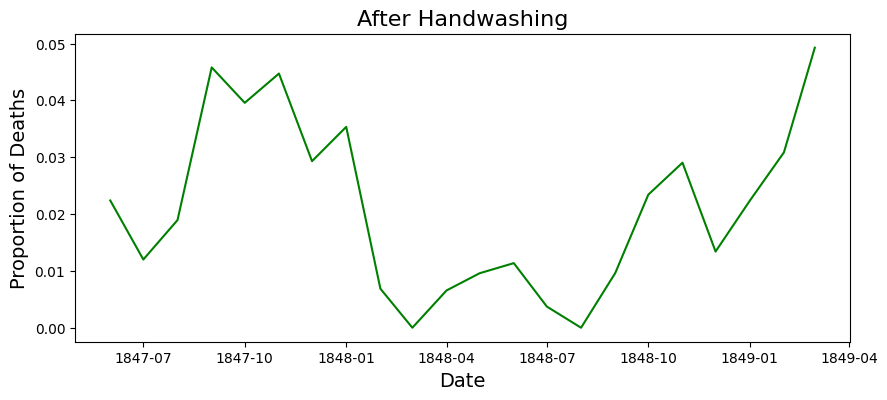

In [8]:
fig,ax = plt.subplots(figsize = (10,4))
x= after_washing["date"]
y= after_washing["Proportion of Deaths"]
plt.plot(x, y, color= "green")
plt.title("After Handwashing", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Proportion of Deaths", fontsize=14)

<Axes: xlabel='date', ylabel='Proportion deaths'>

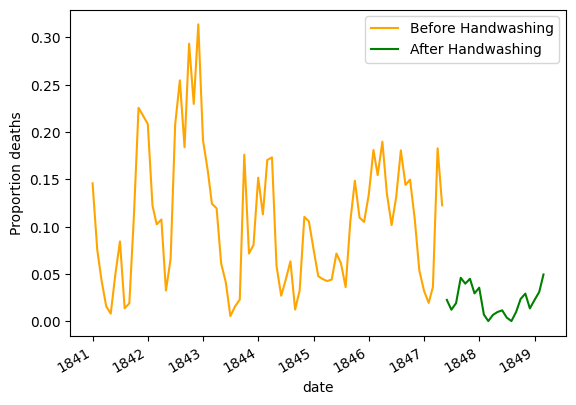

In [9]:
ax= before_washing.plot(x= "date", y= "Proportion of Deaths", label= "Before Handwashing", color="orange")
after_washing.plot(x= "date", y= "Proportion of Deaths", label= "After Handwashing", ax=ax, ylabel= "Proportion deaths", color="green") 

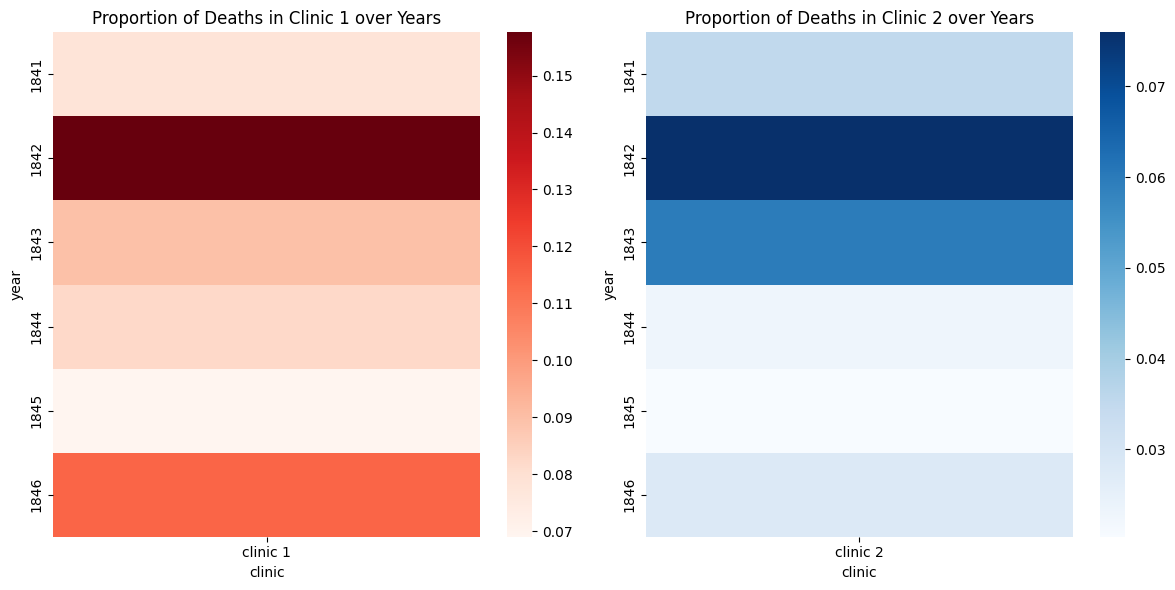

In [6]:
# Heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(clinic_1.pivot_table(index='year', columns='clinic', values='Proportion of Deaths'),
            cmap='Reds', ax=axes[0])
axes[0].set_title('Proportion of Deaths in Clinic 1 over Years')

sns.heatmap(clinic_2.pivot_table(index='year', columns='clinic', values='Proportion of Deaths'),
            cmap='Blues', ax=axes[1])
axes[1].set_title('Proportion of Deaths in Clinic 2 over Years')

plt.tight_layout()
plt.show()

The heatmaps do a better job of painting a clearer picture using the rate of deaths per year. Both clinics seemed to record similar results, with 1842 being the worst year.

#### The difference is pretty clear! The proportion of deaths dramatically decreased after handwashing was made obligatory.

#### Let's calculate exactly how much did handwashing decreased the proportion of deaths on average.

In [10]:
before_proportion = before_washing["Proportion of Deaths"]
after_proportion = after_washing["Proportion of Deaths"]
before_proportion.mean()

0.10504998260908789

In [11]:
after_proportion.mean()

0.021093375097254535

In [12]:
# Calculate the difference between both proportions
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.08395660751183336

#### The minus sign indicate that there is a decrease. So handwashing decreased the proportion of deaths from 10% to 2% i.e, by approximately 8%.

### Conclusion:

In our analysis of the monthly deaths dataset spanning from 1841 to 1849, we trained a linear regression model to predict the number of deaths based on the year. Upon evaluating the model's performance, we obtained a mean squared error (MSE) of approximately 969.

This MSE value reflects the average squared difference between the actual number of deaths and the predictions made by our model. However, its interpretation requires consideration of several factors:

Contextual Understanding: The MSE of 969 provides a quantitative measure of the model's predictive accuracy. Given the historical nature of the dataset and the complexity of factors influencing mortality rates in the 19th century, this MSE represents the overall discrepancy between the predicted and actual values.

Comparative Assessment: To gauge the adequacy of our model's performance, we can compare the MSE against alternative modeling approaches or baseline models. Additionally, benchmarking the MSE against similar studies or historical trends in mortality prediction can provide further context.

Domain Relevance: Understanding the historical context and domain-specific knowledge is crucial in interpreting the MSE. While a lower MSE is generally preferred, the practical significance of this value depends on the implications for historical research or epidemiological studies of the time period.

Cross-Validation Stability: The MSE was obtained through cross-validation, ensuring robustness in the model's performance across different subsets of the data. The consistency of the MSE across folds enhances confidence in the model's ability to generalize to unseen data.

In summary, while the MSE of 969 provides valuable insights into the predictive accuracy of our linear regression model, its interpretation necessitates a nuanced understanding of the dataset, domain-specific considerations, and comparative analysis with alternative models. Further exploration and validation may be warranted to assess the practical implications of this MSE in historical mortality prediction.